# Student Performance Prediction Project

In [2]:
## 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import zipfile
import io
import requests

In [3]:
## 2. Load the Dataset
# URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'

# Download the ZIP file
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Extract specific CSV file from the ZIP file (choose 'student-mat.csv' or 'student-por.csv')
file_name = 'student-mat.csv'
data = pd.read_csv(zip_file.open(file_name), sep=';')


In [10]:
## 3. Data Preprocessing
# Remove missing values
data = data.dropna()

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Convert target to binary (pass/fail)
data['G3'] = data['G3'].apply(lambda x: 0 if x < 10 else 1)

# Ensure all feature values are numeric
X = data.drop('G3', axis=1)
y = data['G3']
X = X.astype(float)


In [11]:
## 4. Split the Dataset
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
## 5. Implement Linear Regression
# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0
R-squared: 1.0


In [14]:
## 6. Gradient Descent (Manual Implementation)
def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    for i in range(iterations):
        gradient = (1/m) * np.dot(X.T, np.dot(X, theta) - y)
        theta -= learning_rate * gradient
        cost = np.sum((np.dot(X,theta)- y)**2)/(2* m)
    return theta, cost_history

# Add bias term and implement gradient descent
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta, cost_history = gradient_descent(X_b, y_train.values, learning_rate=0.01, iterations=1000)

print(f'Theta (parameters): {theta}')

Theta (parameters): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


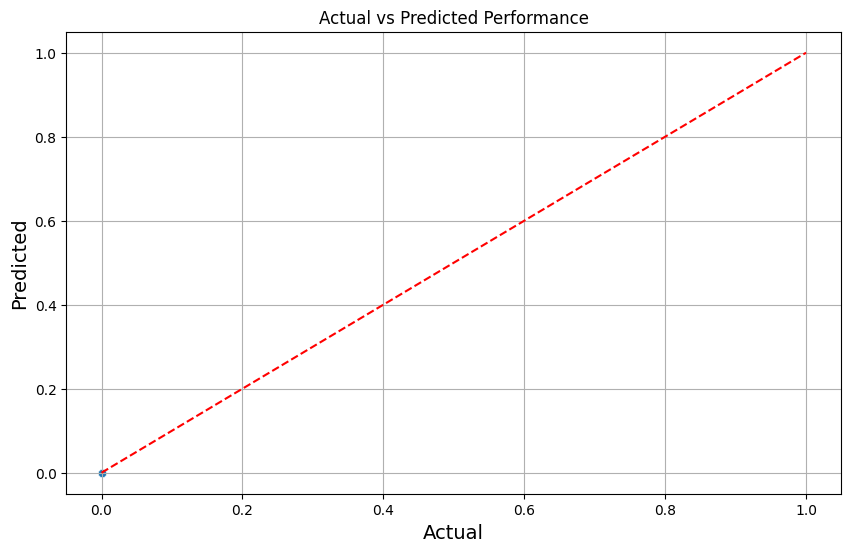

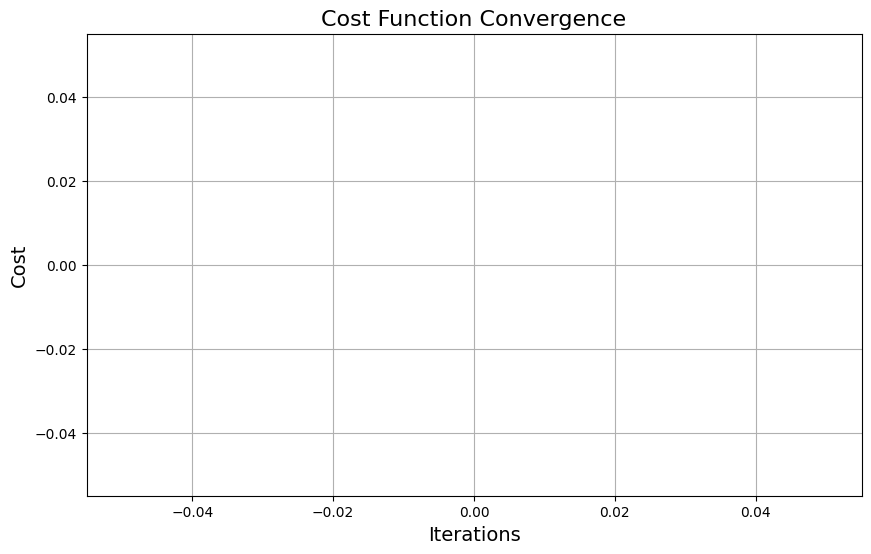

In [16]:
## 7. Visualization
# Plot Actual vs Predicted Performance
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, 1], [0, 1], '--r')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Actual vs Predicted Performance')
plt.grid(True)
plt.show()

# Enhanced Plot for Cost Function Convergence
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cost_history) + 1), cost_history, 'b-', linewidth=2)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.title('Cost Function Convergence', fontsize=16)
plt.grid(True)
plt.show()

